<a href="https://colab.research.google.com/github/arjundvn24/matlab24/blob/main/ML_102016055_EVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv("./USA_Housing.csv")
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
column= ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population','Price']
dataset[column] = standScaler.fit_transform(dataset[column])

In [5]:
target = dataset["Price"]
dataset = dataset.drop(["Price"],axis=1)

In [6]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
cv = KFold(n_splits=5, shuffle=False)
linear_model = LinearRegression()
it = 1
for train_index,test_index in cv.split(dataset):
    print("Iteration ",it,":-")
    X_train,X_test,y_train,y_test = dataset.iloc[train_index],dataset.iloc[test_index],target.iloc[train_index],target.iloc[test_index]
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    print("For linear regression, R2 score = ",r2_score(y_test,y_pred))
    print("Beta matrix = ",linear_model.coef_)
    it+=1

Iteration  1 :-
For linear regression, R2 score =  0.9175899480765108
Beta matrix =  [0.65119009 0.46463099 0.34247984 0.01000836 0.43008551]
Iteration  2 :-
For linear regression, R2 score =  0.920301549640113
Beta matrix =  [0.64677644 0.46788282 0.34705638 0.00480634 0.4249882 ]
Iteration  3 :-
For linear regression, R2 score =  0.9152429915320016
Beta matrix =  [0.65347427 0.46321934 0.34459128 0.00742108 0.42744459]
Iteration  4 :-
For linear regression, R2 score =  0.9208503836977655
Beta matrix =  [0.65118401 0.46596232 0.33912066 0.00318412 0.4285624 ]
Iteration  5 :-
For linear regression, R2 score =  0.9138111758717495
Beta matrix =  [0.65361133 0.46378742 0.34520317 0.00353179 0.42506886]


Coefficients =  0.335664453359397 3.919910841565623e-16


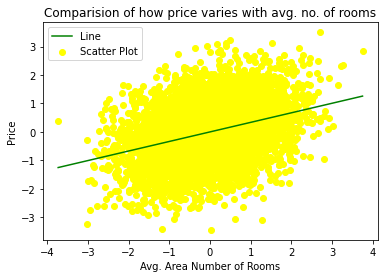

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,target, test_size = 0.30, random_state = 42)
X = dataset['Avg. Area Number of Rooms'].values
mean_x = np.mean(X)
mean_y = np.mean(target)
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (target[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)

print("Coefficients = ",m,c)
max_x = np.max(X) 
min_x = np.min(X) 
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
plt.plot(x, y, color='green', label='Line')
plt.scatter(X,target, c='yellow', label='Scatter Plot')
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.legend()
plt.title("Comparision of how price varies with avg. no. of rooms")
plt.show()


In [28]:
#Multiple linear regression with gradient descent
def gradient_descent(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = assumption(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    
    return theta, cost

def assumption(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

def regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = assumption(theta, X, n)
    theta, cost = gradient_descent(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

For learning rate = 1e-3
Regression coefficients =  [[-0.00471157  0.41351393  0.29326237  0.20029293  0.07281102  0.2659326 ]]


Text(0, 0.5, 'Cost')

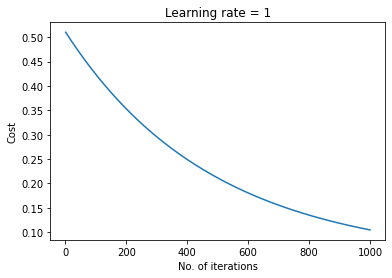

In [29]:
print("For learning rate = 1e-3")
theta, cost = regression(X_train, y_train,1e-3,1000)
print("Regression coefficients = ",theta)
cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.title("Learning rate = 1")
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

For learning rate = 1e-2
Regression coefficients =  [[-0.00225987  0.65263395  0.46488077  0.34041383  0.00918618  0.42771045]]


Text(0, 0.5, 'Cost')

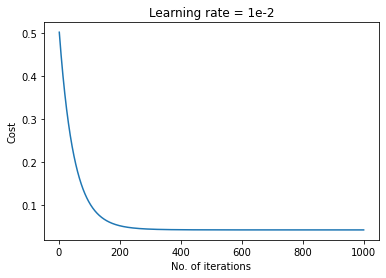

In [30]:
print("For learning rate = 1e-2")
theta, cost = regression(X_train, y_train,1e-2,1000)
print("Regression coefficients = ",theta)
cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.title("Learning rate = 1e-2")
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

For learning rate = 1e-1
Regression coefficients =  [[-0.00224882  0.65272181  0.46493181  0.34132186  0.00825197  0.42771714]]


Text(0, 0.5, 'Cost')

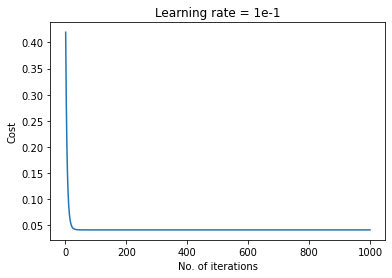

In [31]:
print("For learning rate = 1e-1")
theta, cost = regression(X_train, y_train,1e-1,1000)
print("Regression coefficients = ",theta)
cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.title("Learning rate = 1e-1")
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

For learning rate = 1
Regression coefficients =  [[-0.00224882  0.65272181  0.46493181  0.34132186  0.00825197  0.42771714]]


Text(0, 0.5, 'Cost')

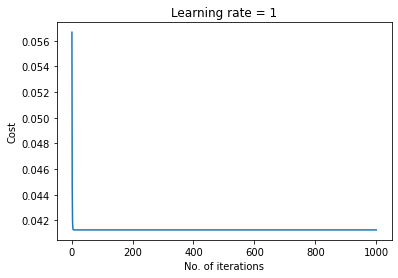

In [32]:
print("For learning rate = 1")
theta, cost = regression(X_train, y_train,1,1000)
print("Regression coefficients = ",theta)
cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.title("Learning rate = 1")
plt.xlabel('No. of iterations')
plt.ylabel('Cost')